#### **MNIST MLP with pytorch**

This is a template of an MNIST classifier with an Artificial Neural Network (MLP)
If follows the basic blocks of a Deep Learning classifier

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [2]:
# Device GPU configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters

num_classes = 10  # Digits 0-9
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#### **Reading MNIST Dataset**
Most frameworks offer an easy way to download the MNIST dataset. In this case we use the datasets method

PyTorch models expect input data in the form of tensors because tensors are the fundamental data structure in this framework for computation.

You can see below the variable **images** is a tensor and this variable contains all the data to be feed to the network. 

In [3]:
# read data

# MNIST dataset
train_dataset = datasets.MNIST(root='data', 
                               train=True, 
                               transform=transforms.ToTensor(), 
                               download=True)

test_dataset = datasets.MNIST(root='data', 
                              train=False, 
                              transform=transforms.ToTensor())

# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [4]:
type(test_dataset)

torchvision.datasets.mnist.MNIST

#### **ANN architecture definition**
This is the key part of the notebook, in this cell we define the structure of the network 
and all the different elements mainly

- Activation function 
- Layer size
- Number of layers

In this example you have 3 models. Give them a try. To use one model or the other just make sure the model() construct is based on the parameters you want to try 

(you can do this by deleting the line "model()=" in the models you don't want to use)


In [5]:
# MLP Model 1 hidden layer input size 784, output layer 10 (num of classes)
# ANN sizing details
input_size = 784  # 28x28 images
hidden_size = 500

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = MLP(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [6]:
# This example has a Neural network with more layers. Try it!
input_size = 784  # 28x28 images

class MLP_3layers(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MLP_3layers, self).__init__()
        
        # First fully connected layer
        self.fc1 = nn.Linear(input_size, 64)
        self.relu1 = nn.ReLU()
        
        # Second fully connected layer
        self.fc2 = nn.Linear(64, 128)
        self.relu2 = nn.ReLU()
        
        # Third fully connected layer
        self.fc3 = nn.Linear(128, 64)
        self.relu3 = nn.ReLU()
        
        # Dropout layer for regularization
        self.dropout = nn.Dropout(p=0.5)
        
        # Final output layer
        self.fc4 = nn.Linear(64, num_classes)
    
    def forward(self, x):
        # Pass through first layer
        out = self.fc1(x)
        out = self.relu1(out)
        
        # Pass through second layer
        out = self.fc2(out)
        out = self.relu2(out)
        
        # Pass through third layer
        out = self.fc3(out)
        out = self.relu3(out)
        
        # Apply dropout
        out = self.dropout(out)
        
        # Final output layer
        out = self.fc4(out)
        
        return out
    
model = MLP_3layers(input_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
hidden_size1 = 256
hidden_size2 = 128
input_size = 784  # 28x28 images

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        out = x.view(-1, input_size)  # Flatten the image
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

model = NeuralNet(input_size, hidden_size1, hidden_size2, num_classes).to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#### **Network training**
In this training the network is trained with the data from the MNIST we have prepared previously

In [8]:
# Training the model
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        epoch_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accuracy
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss /= len(train_loader)
    train_losses.append(epoch_loss)
    epoch_accuracy = 100 * correct / total
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')



Epoch [1/5], Loss: 0.3212, Accuracy: 90.98%
Epoch [2/5], Loss: 0.1234, Accuracy: 96.33%
Epoch [3/5], Loss: 0.0803, Accuracy: 97.50%
Epoch [4/5], Loss: 0.0604, Accuracy: 98.13%
Epoch [5/5], Loss: 0.0440, Accuracy: 98.61%


In [9]:
print("the variable images is a ", type(images), " with a dimension of ", images.shape)

the variable images is a  <class 'torch.Tensor'>  with a dimension of  torch.Size([100, 784])


In [10]:
# Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%')



Test Accuracy: 97.68%


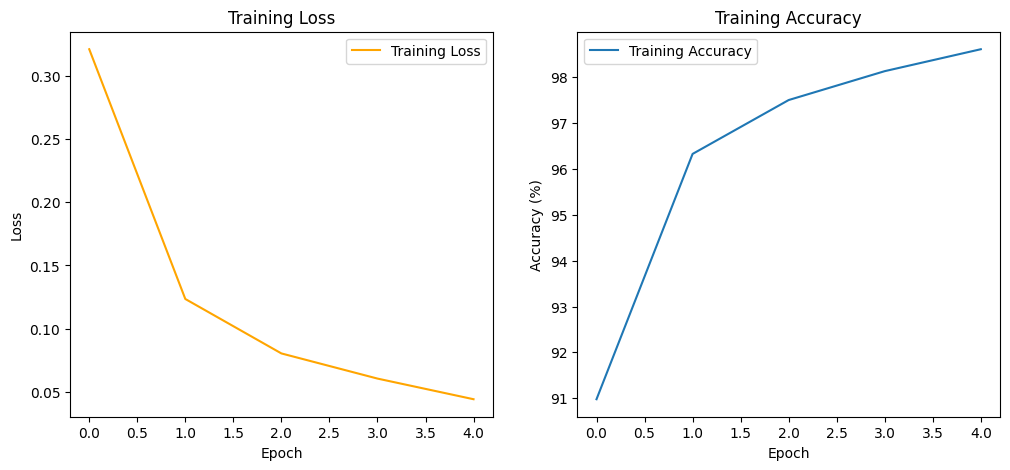

In [11]:
# Visualize Loss and Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.legend()

plt.show()